## **Αναγνώριση Προτύπων - 3η Εργαστηριακή Άσκηση** ##

## Αναγνώριση Είδους και Εξαγωγή Συναισθήματος από Μουσική ##

Χρυσούλα Κοσμά - 03114025

Λεωνίδας Αβδελάς - 03113182

9ο Εξάμηνο ΣΗΜΜΥ ΕΜΠ

Ακολουθούν τα **βήματα 1-8 του μέρους της Προπαρασκευής** του 3ου Εργαστηρίου.

Αρχικά, κάνουμε import ορισμένες από τις βιβλιοθήκες που είναι απαραίτητες για την εκτέλεση των βημάτων της εργασίας.

In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gzip
import matplotlib.pyplot as plt
import librosa

from librosa import display
from librosa import beat

## **Βήμα 1 - Εξοικείωση με Kaggle kernel** ##
Στη συνέχεια, με τη χρήση των εντολών os.listdir("../input") και os.listdir("../input/data/data/") εξερευνούμε τους φακέλους - αρχεία που βρίσκονται στο directory input και input/data/data/. Παρατηρούμε ότι στο δεύτερο diretory βρίσκονται 4 υπόφακελοι 'fma_genre_spectrograms', 'multitask_dataset', 'fma_genre_spectrograms_beat', 'multitask_dataset_beat'. Στην προπαρασκευή θα εργαστούμε με τα χαρακτηριστικά των δειγμάτων που βρίσκονται στα  'fma_genre_spectrograms' ,'fma_genre_spectrograms_beat'.

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print('Files in the input directory')
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
print('\nFolders in the data directory')
print(os.listdir("../input/data/data/"))

Files in the input directory
['data']

Folders in the data directory
['multitask_dataset', 'fma_genre_spectrograms', 'fma_genre_spectrograms_beat', 'multitask_dataset_beat']


Επιπλέον, τυπώνουμε τα περιεχόμενα του directory "../input/data/data/fma_genre_spectrograms", στο οποίο βρίσκεται ένα από τα datasets με τα οποία θα εργαστούμε στη συνέχεια. Παρατηρούμε ότι περιλαμβάνει τα 'train', 'test', 'train_labels.txt', 'test_labels.txt'. Επίσης, τυπώνουμε το περιεχόμενο του "../input/data/data/fma_genre_spectrograms/train_labels.txt" με τις ετικέτες του αντίστοιχου train set και παρατηρούμε ότι αυτό περιλαμβάνει τα διαφορετικά IDs με τα οποία μπορούμε να έχουμε πρόσβαση σε κάθε αρχείο του φακέλου "../input/data/data/fma_genre_spectrograms/train" καθώς και την κλάση (Genre) στην οποία ανήκει το συγκεκριμένο δείγμα. Παρατηρούμε ότι έχουμε 20 διαφορετικές κλάσεις μουσικών κομματιών.

In [3]:
print('Files in fma_genre_spectrograms folder')
print(os.listdir("../input/data/data/fma_genre_spectrograms"))
path = "../input/data/data/fma_genre_spectrograms/train_labels.txt"
f = open(path, 'r')
file_contents = f.read()
print('\nTrain_labels.txt in fma_genre_spectrograms')
print(file_contents)
f.close()

Files in fma_genre_spectrograms folder
['train', 'test', 'train_labels.txt', 'test_labels.txt']

Train_labels.txt in fma_genre_spectrograms
Id	Genre
1042.fused.full.npy.gz	Blues
1043.fused.full.npy.gz	Blues
1044.fused.full.npy.gz	Blues
1045.fused.full.npy.gz	Blues
1047.fused.full.npy.gz	Blues
1048.fused.full.npy.gz	Blues
11957.fused.full.npy.gz	Blues
123943.fused.full.npy.gz	Blues
123944.fused.full.npy.gz	Blues
123945.fused.full.npy.gz	Blues
123947.fused.full.npy.gz	Blues
123949.fused.full.npy.gz	Blues
123950.fused.full.npy.gz	Blues
123951.fused.full.npy.gz	Blues
123952.fused.full.npy.gz	Blues
123955.fused.full.npy.gz	Blues
123960.fused.full.npy.gz	Blues
123961.fused.full.npy.gz	Blues
123963.fused.full.npy.gz	Blues
12787.fused.full.npy.gz	Blues
12790.fused.full.npy.gz	Blues
12792.fused.full.npy.gz	Blues
12796.fused.full.npy.gz	Blues
12803.fused.full.npy.gz	Blues
12884.fused.full.npy.gz	Blues
12901.fused.full.npy.gz	Blues
13193.fused.full.npy.gz	Blues
13671.fused.full.npy.gz	Blues
15510

In [4]:
path = "../input/data/data/fma_genre_spectrograms/train"
print('Files in fma_genre_spectrograms/train folder')
print(os.listdir(path))

Files in fma_genre_spectrograms/train folder
['21532.fused.full.npy.gz', '34059.fused.full.npy.gz', '29936.fused.full.npy.gz', '47666.fused.full.npy.gz', '18026.fused.full.npy.gz', '4705.fused.full.npy.gz', '19588.fused.full.npy.gz', '36741.fused.full.npy.gz', '77577.fused.full.npy.gz', '344.fused.full.npy.gz', '35748.fused.full.npy.gz', '11748.fused.full.npy.gz', '18646.fused.full.npy.gz', '4194.fused.full.npy.gz', '39916.fused.full.npy.gz', '145.fused.full.npy.gz', '66857.fused.full.npy.gz', '19572.fused.full.npy.gz', '20576.fused.full.npy.gz', '48396.fused.full.npy.gz', '4043.fused.full.npy.gz', '10930.fused.full.npy.gz', '30900.fused.full.npy.gz', '28607.fused.full.npy.gz', '99255.fused.full.npy.gz', '18690.fused.full.npy.gz', '50753.fused.full.npy.gz', '34672.fused.full.npy.gz', '49431.fused.full.npy.gz', '34694.fused.full.npy.gz', '20375.fused.full.npy.gz', '86127.fused.full.npy.gz', '24803.fused.full.npy.gz', '18813.fused.full.npy.gz', '75207.fused.full.npy.gz', '27365.fused.ful

## **Βήμα 2 -  Εξοικείωση με mel spectrograms** ##
Για την ανάγνωση ενός spectrogram file από το train set "../input/data/data/fma_genre_spectrograms/train", δημιουργήσαμε τη συνάρτηση read_spec_file η οποία λαμβάνει ως είσοδο το path στο συγκεκριμένο αρχείο μέσα στο φάκελο train, με τη μορφή "../input/data/data/fma_genre_spectrograms/train/Id" (βάζοντας το επιθυμητό Id) και επιστρέφει ένα nympy array που περιλαμβάνει τα χαρακτηριστικά ανά timestep για το συγκεκριμένο αρχείο. Επιλέγουμε τυχαία δύο διαφορετικά αρχεία με διαφορετικές ετικέτες κοιτώντας το αρχείο "../input/data/data/fma_genre_spectrograms/train_labels.txt". Συγκεκριμένα, το ID 1042.fused.full.npy.gz με Genre Blues και το ID 115357.fused.full.npy.gz με Genre Chiptune. Από τους πίνακες χαρακτηριστικών που επιστρέφονται για κάθε δείγμα παίρνουμε το mel spectrogram επιλέγοντας τα 128 πρώτα χαρακτηριστικά των πινάκων, τα οποία εμφανίζουμε στη συνέχεια.

In [5]:
def read_spec_file(spectrogram_file): 
    with gzip.GzipFile(spectrogram_file, 'r') as f:
        spectrograms = np.load(f)
    return spectrograms

In [6]:
path_to_id1 = "../input/data/data/fma_genre_spectrograms/train/1042.fused.full.npy.gz"
spectrograms_1 = read_spec_file(path_to_id1)
print('Shape of Spectrogram of label Blues, id=1042:',np.shape(spectrograms_1))
# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spect_1 = spectrograms_1[:128]
print('Mel Spectrogram of label Blues, id=1042\n',mel_spect_1)

path_to_id2 = "../input/data/data/fma_genre_spectrograms/train/115357.fused.full.npy.gz"
spectrograms_2 = read_spec_file(path_to_id2)
print('\nShape of Spectrogram of label Chiptune, id=115357:',np.shape(spectrograms_2))
mel_spect_2 = spectrograms_2[:128]
print('Mel Spectrogram of label Chiptune, id=115357\n',mel_spect_2)

Shape of Spectrogram of label Blues, id=1042: (140, 1293)
Mel Spectrogram of label Blues, id=1042
 [[-43.83311129 -38.12250853 -41.59139609 ... -31.94057632 -34.06573274
  -41.04537492]
 [-38.70563043 -33.27389471 -29.96261656 ... -30.6798495  -29.59102852
  -27.96117793]
 [-38.35403122 -27.27369542 -19.7837484  ... -18.57387826 -20.84280373
  -23.22100798]
 ...
 [-80.         -76.01939964 -72.64204372 ... -60.7489931  -59.0818695
  -55.24135367]
 [-80.         -80.         -80.         ... -66.71647555 -61.45574029
  -56.17455526]
 [-80.         -80.         -80.         ... -74.9795387  -65.87385741
  -58.91387911]]

Shape of Spectrogram of label Chiptune, id=115357: (140, 1293)
Mel Spectrogram of label Chiptune, id=115357
 [[-24.27522017 -26.79909421 -30.49098716 ... -22.21925921 -19.41040764
  -18.10588765]
 [-18.58992176 -19.32844601 -29.98143541 ... -12.30222193 -12.33649445
  -13.45636446]
 [-12.57966977  -9.45917486  -8.91792308 ... -17.68698164 -17.19164503
  -14.98194529]
 ..

Με τη χρήση της συνάρτησης plot_specshow απεικονίζουμε τα mel spectrograms για τα διαφορετικά labels που επιλέξαμε προηγουμένως με χρήση της συνάρτησης librosa.display.specshow. Τα αποτελέσματα εμφανίνται στη συνέχεια.

In [7]:
def plot_specshow(title,features):
    fig = plt.figure()
    librosa.display.specshow(features)
    fig.suptitle(title)
    plt.xlabel('time')
    plt.ylabel('frequency')
    plt.colorbar()
    return

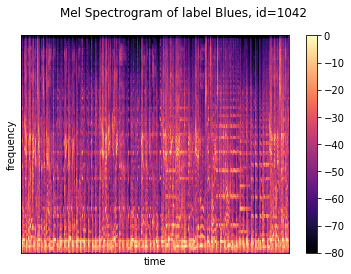

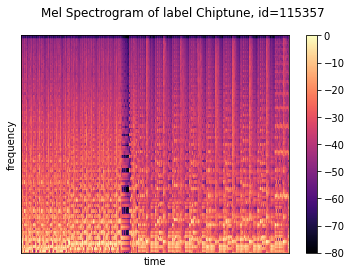

In [8]:
plot_specshow('Mel Spectrogram of label Blues, id=1042',mel_spect_1)
plot_specshow('Mel Spectrogram of label Chiptune, id=115357',mel_spect_2)

Αυτό που είναι αρκετά ξεκάθαρο βλέποντας το Chiptun mel-spectogram είναι η διακριτότητα των ήχων που υπάρχουν σε αυτό. Καθώς το chiptune είναι ήχος που δημιουργήται ηλεκτρονικά (και επομένως όλοι οι ήχοι είναι ψηφιακοί - μια συνότητα) είναι εύκολο να διακρίνουμε τις συχνότητες από τις οποίες αποτελέιται σε κάθε χρονική στιγμή.

Αντίθετα στην jazz, παρατηρούμε μεγαλύτερο συχνοτικό περιεχόμενο στις μεσαίες συχνότητες, που μας προιδεάζει ότι μπορεί να υπάρχει κάποια φωνή ή μελωδία εκεί. Επίσης, βλέπουμε μεγάλο περιεχόμενο στις χαμηλές συχνότητες που, μας οδηγεί στην σκέψη ύπαρξης κρουστών ή μπάσου - όργανα που εμφανίζονται συχνά στην jazz.

## **Βήμα 3 -  Εξοικείωση με beat-synced spectrograms** ##
Αρχικά, τυπώνουμε τις διαστάσεις των mel spectrograms των labels που εμφανίσαμε στο προηγούμενο ερώτημα. Παρατηρούμε ότι αποτελούνται εκτός από 128 χαρακτηριστικά που έχουμε επιλέξει και από 1293 timesteps ανά χαρακτηριστικό. Παρατηρούμε ότι με τόσο μεγάλο αριθμό timesteps δεν είναι ρεαλιστικό να εκπαιδεύσουμε ένα LSTM, καθώς επιβαρύνει τη μνήμη του μοντέλου καθώς και τη χρονική πολυπλοκότητα για τον υπολογισμό της εξόδου του νευρωνικού.

In [9]:
print('Shape of Mel Spectrogram of label Blues, id=1042, (n_features,timesteps) =',np.shape(mel_spect_1))
print('Shape of Mel Spectrogram of label Chiptune, id=115357, (n_features,timesteps) =',np.shape(mel_spect_2))

Shape of Mel Spectrogram of label Blues, id=1042, (n_features,timesteps) = (128, 1293)
Shape of Mel Spectrogram of label Chiptune, id=115357, (n_features,timesteps) = (128, 1293)


Ένας τρόπος να μειώσουμε  τα timesteps είναι να συγχρονίσουμε τα σπεκτρογράμματα πάνω στο beat. Για αυτό το λόγο παίρνουμε το median ανάμεσα στα σημεία που χτυπάει το beat της μουσικής. Τα αντίστοιχα αρχεία δίνονται στο φάκελο "../input/data/data/fma_genre_spectrograms_beat". Ακολουθούμε την ίδια διαδικασία με το ερώτημα 2 για να πάρουμε τα χαρακτηριστικά των δειγμάτων με ID 1042.fused.full.npy.gz με Genre Blues και με ID 115357.fused.full.npy.gz με Genre Chiptune από το φάκελο "../input/data/data/fma_genre_spectrograms_beat/train" με τη χρήση της read_spec_file που έχουμε ορίσει. Από τα δείγματα αυτα παίρνουμε τα mel spectrograms ομοίως με το προηγούμενο ερώτημα και τα εμφανίζουμε στη συνέχεια.

In [10]:
print('Files in fma_genre_spectrograms_beat folder')
print(os.listdir("../input/data/data/fma_genre_spectrograms_beat"))

path_to_id1 = "../input/data/data/fma_genre_spectrograms_beat/train/1042.fused.full.npy.gz"
spectrograms_beat_1 = read_spec_file(path_to_id1)
print('\nShape of Spectrogram beat-synced of label Blues, id=1042:',np.shape(spectrograms_beat_1))
# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spect_beat_1 = spectrograms_beat_1[:128]
print('Mel Spectrogram beat-synced of label Blues, id=1042\n',mel_spect_beat_1)

path_to_id2 = "../input/data/data/fma_genre_spectrograms_beat/train/115357.fused.full.npy.gz"
spectrograms_beat_2 = read_spec_file(path_to_id2)
print('\nShape of Spectrogram beat-synced of label Chiptune, id=115357:',np.shape(spectrograms_beat_2))
mel_spect_beat_2 = spectrograms_beat_2[:128]
print('Mel Spectrogram beat-synced of label Chiptune, id=115357\n',mel_spect_beat_2)

Files in fma_genre_spectrograms_beat folder
['train', 'test', 'train_labels.txt', 'test_labels.txt']

Shape of Spectrogram beat-synced of label Blues, id=1042: (140, 62)
Mel Spectrogram beat-synced of label Blues, id=1042
 [[-36.118526   -28.15758774 -32.54357667 ... -31.80504671 -26.5883066
  -25.9277751 ]
 [-27.80102462 -22.10362778 -20.53231276 ... -24.13352906 -22.37411682
  -21.60104966]
 [-21.80082533 -15.19530255 -19.85716378 ... -12.41603735 -12.0298794
  -16.00819124]
 ...
 [-70.54652955 -63.65651172 -51.86273607 ... -68.7260515  -64.50103145
  -52.19700402]
 [-80.         -67.62001943 -58.37751446 ... -72.82217083 -69.21375789
  -56.53101339]
 [-80.         -79.58322706 -69.44173175 ... -80.         -80.
  -66.79548829]]

Shape of Spectrogram beat-synced of label Chiptune, id=115357: (140, 62)
Mel Spectrogram beat-synced of label Chiptune, id=115357
 [[-21.97317205 -11.13857646 -11.82918404 ... -14.42857282 -15.10906508
  -15.25849436]
 [-17.0340681   -1.72459939  -9.54407181

Επίσης, με τη χρήση της συνάρτησης plot_specshow του ερωτήματος δύο απεικονίζουμε τα αντίστοιχα mel spectrograms με τα μειωμένα timesteps. Παρατηρούμε ότι αυτά έχουν διαστάσεις 128 χαρακτηριστικά επί 62 timesteps, έναντι 1293 που είχαν στο προηγούμενο ερώτημα. 

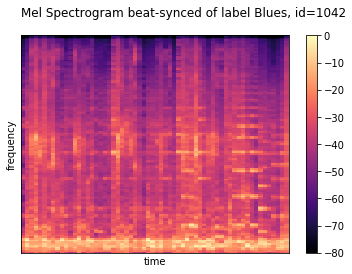

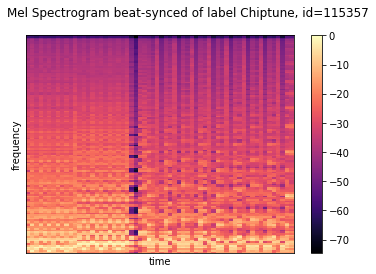

In [11]:
plot_specshow('Mel Spectrogram beat-synced of label Blues, id=1042',mel_spect_beat_1)
plot_specshow('Mel Spectrogram beat-synced of label Chiptune, id=115357',mel_spect_beat_2)

In [12]:
print('Shape of Mel Spectrogram beat-synced of label Blues, id=1042, (n_features,timesteps) =',np.shape(mel_spect_beat_1))
print('Shape of Mel Spectrogram beat-synced of label Chiptune, id=115357, (n_features,timesteps) =',np.shape(mel_spect_beat_2))

Shape of Mel Spectrogram beat-synced of label Blues, id=1042, (n_features,timesteps) = (128, 62)
Shape of Mel Spectrogram beat-synced of label Chiptune, id=115357, (n_features,timesteps) = (128, 62)


Συγκρίνοντας αυτά τα σπεκτρογράμματα με τα αρχικά, βλέπουμε ότι τα χαρακτηριστικά των σπεκτρογραμμάτων που μας οδήγησαν στο να αναγνωρίσουμε το είδος πριν παραμένουν. 

Όμως βλέπουμε ότι η ακρίβεια έχει χαθεί σε μεγάλο βαθμό, που μπορεί να οδηγήσει σε χαμηλότερα αποτελέσματα.

## **Βήμα 3 -  Εξοικείωση με chromagrams** ##
Τα χρωμογράμματα σχετίζονται με τις δώδεκα διαφορετικές νότες της μουσικής και μπορούν να χρησιμοποιηθούν ως εργαλείο για την ανάλυση της μουσικής αναφορικά με τα αρμονικά και μελωδικά χαρακτηριστικά της ενώ επίσης είναι αρκετά εύρωστα και στην αναγνώριση των αλλαγών του ηχοχρώματος και των οργάνων. Για τα χαρακτηριστικά των δύο διαφορετικών δειγμάτων labels που έχουμε μελετήσει παραπάνω των οποίων επιστρέψαμε τους πίνακες χαρακτηριστικών από τους φακέλους "../input/data/data/fma_genre_spectrograms/train", "../input/data/data/fma_genre_spectrograms_beat/train" παίρνουμε τα 12 τελευταία χαρακτηριστικά των πινάκων. Εμφανίζουμε στη συνέχεια τα χρωμογράμματα με τη χρήση της plot_specshow του ερωτήματος 2, για τα δείγματα με  ID 1042.fused.full.npy.gz με Genre Blues και με ID 115357.fused.full.npy.gz με Genre Chiptune αρχικά για όλα τα timesteps  στο φάκελο "fma_genre_spectrograms" και στη συνέχεια για τα μειωμένα timesteps στο φάκελο "fma_genre_spectrograms_beat".

Shape of Chromagram of label Blues, id=1042, (n_features,timesteps) = (12, 1293)
Shape of Chromagram of label Chiptune, id=115357, (n_features,timesteps) = (12, 1293)


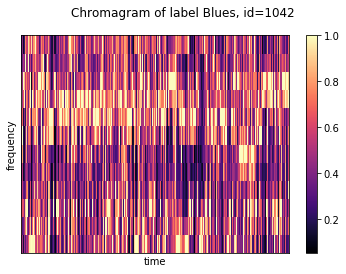

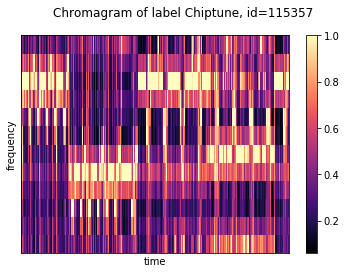

In [13]:
chroma_1 = spectrograms_1[128:]
chroma_2 = spectrograms_2[128:]

plot_specshow('Chromagram of label Blues, id=1042',chroma_1)
plot_specshow('Chromagram of label Chiptune, id=115357',chroma_2)

print('Shape of Chromagram of label Blues, id=1042, (n_features,timesteps) =',np.shape(chroma_1))
print('Shape of Chromagram of label Chiptune, id=115357, (n_features,timesteps) =',np.shape(chroma_2))

Παρατηρούμε ότι στην τζάζ, χρησιμοποιούνται όλες οι νότες σε ίδιο ρυθμό, γεγονός χαρακτηριστικό για αυτή την μουσική.

Αντίθετα στην chiptune σε διαφορετικό χρονικό διάστημα υπάρχει μια κυρίαρχη νότα.

Shape of Chromagram beat-synced of label Blues, id=1042, (n_features,timesteps) = (12, 62)
Shape of Chromagram beat-synced of label Chiptune, id=115357, (n_features,timesteps) = (12, 62)


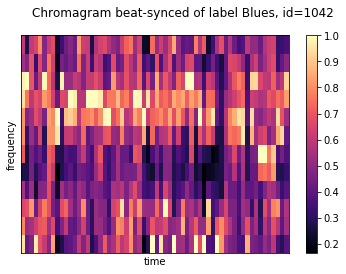

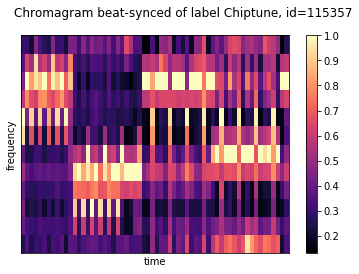

In [14]:
chroma_beat_1 = spectrograms_beat_1[128:]
chroma_beat_2 = spectrograms_beat_2[128:]

plot_specshow('Chromagram beat-synced of label Blues, id=1042',chroma_beat_1)
plot_specshow('Chromagram beat-synced of label Chiptune, id=115357',chroma_beat_2)

print('Shape of Chromagram beat-synced of label Blues, id=1042, (n_features,timesteps) =',np.shape(chroma_beat_1))
print('Shape of Chromagram beat-synced of label Chiptune, id=115357, (n_features,timesteps) =',np.shape(chroma_beat_2))

Εδώ σε αντίθεση με τα mel spectrograms, η μείωση των timesteps οδηγεί σε αρκετά λιγότερα διακριτά αποτελέσματα, που μάλλον θα οδηγήσει σε χειρότερα αποτελέσματα.


## **Βήμα 4 -  Φόρτωση δεδομένων** ##
Στο βήμα αυτό, δημιουργήσαμε ένα PyTorch Dataset για τη φόρτωση ενός spectrogram dataset. Χρησιμοποιήσαμε τις υλοποιημένες μεθόδους που δόθηκαν στο βοηθητικό υλικό και οι οποίες αποτελούνται από:
* Τη συνάρτηση torch_train_val_split
* Τη συνάρτηση read_spectrogram
* Την κλάση LabelTransformer
* Την κλάση PaddingTransform
* Την κλάση SpectrogramDataset
Για τη δημιουργία του train_loader, val_loader καλούμε τη SpectrogramDataset για τη φόρτωση των δεδομένων από το επιθυμητό path ('../input/data/data/fma_genre_spectrograms_beat/' ή '../input/data/data/fma_genre_spectrograms/' για τα βήματα της προπαρασκευή που ακολουθούν) και κατόπιν τη torch_train_val_split για το χωρισμό σε train, validation set. Στην torch_train_val_split δίνονται ως παράμετροι το batch size για το train και το validation set αντίστοιχα, καθώς και το ποσοστό του αρχικού dataset από το οποίο θα προκύψει το validation set. Στην κλήση του SpectrogramDataset θέτουμε train=True και class_mapping=None καθώς θέλουμε να ληφθούν και οι είκοσι κλάσεις των δειγμάτων υπόψιν και να μην γίνει κάποια ομαδοποίηση σε αυτές για την μείωση τους. Για τη δημιοργία του test_loader καλούμε αντίστοιχα τη SpectrogramDataset με train=False και class_mapping=None και τη Dataloader.

In [15]:
import copy

from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from torch.utils.data import SubsetRandomSampler, DataLoader

In [16]:
class_mapping = {
    'Rock': 'Rock',
    'Psych-Rock': 'Rock',
    'Indie-Rock': None,
    'Post-Rock': 'Rock',
    'Psych-Folk': 'Folk',
    'Folk': 'Folk',
    'Metal': 'Metal',
    'Punk': 'Metal',
    'Post-Punk': None,
    'Trip-Hop': 'Trip-Hop',
    'Pop': 'Pop',
    'Electronic': 'Electronic',
    'Hip-Hop': 'Hip-Hop',
    'Classical': 'Classical',
    'Blues': 'Blues',
    'Chiptune': 'Electronic',
    'Jazz': 'Jazz',
    'Soundtrack': None,
    'International': None,
    'Old-Time': None
}

In [17]:
def torch_train_val_split(dataset, batch_train, batch_eval,val_size=.2, shuffle=True, seed=42):
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    val_split = int(np.floor(val_size * dataset_size))
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    train_indices = indices[val_split:]
    val_indices = indices[:val_split]

    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset,
                              batch_size=batch_train,
                              sampler=train_sampler)
    val_loader = DataLoader(dataset,
                            batch_size=batch_eval,
                            sampler=val_sampler)
    return train_loader, val_loader

In [18]:
def read_spectrogram(spectrogram_file, chroma=True):
    with gzip.GzipFile(spectrogram_file, 'r') as f:
        spectrograms = np.load(f)
    # spectrograms contains a fused mel spectrogram and chromagram
    # Decompose as follows
    return spectrograms.T

In [19]:
class LabelTransformer(LabelEncoder):
    def inverse(self, y):
        try:
            return super(LabelTransformer, self).inverse_transform(y)
        except:
            return super(LabelTransformer, self).inverse_transform([y])

    def transform(self, y):
        try:
            return super(LabelTransformer, self).transform(y)
        except:
            return super(LabelTransformer, self).transform([y])

In [20]:
class PaddingTransform(object):
    def __init__(self, max_length, padding_value=0):
        self.max_length = max_length
        self.padding_value = padding_value

    def __call__(self, s):
        if len(s) == self.max_length:
            return s

        if len(s) > self.max_length:
            return s[:self.max_length]

        if len(s) < self.max_length:
            s1 = copy.deepcopy(s)
            pad = np.zeros((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
            s1 = np.vstack((s1, pad))
            return s1

In [21]:
class SpectrogramDataset(Dataset):
    def __init__(self, path, class_mapping=None, train=True, max_length=-1):
        t = 'train' if train else 'test'
        p = os.path.join(path, t)
        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping)
        self.feats = [read_spectrogram(os.path.join(p, f)) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(self.label_transformer.fit_transform(labels)).astype('int64')

    def get_files_labels(self, txt, class_mapping):
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            label = l[1]
            if class_mapping:
                label = class_mapping[l[1]]
            if not label:
                continue
            files.append(l[0])
            labels.append(label)
        return files, labels

    def __getitem__(self, item):
        l = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], l

    def __len__(self):
        return len(self.labels)

Αρχικά, δημιουργούμε τους train_loader, val_loader, test_loader που θα χρησιμοποιήσουμε στα βήματα 6,7 για την εκπαίδευση και την αξιολόγηση του Basic LSTM. Επιλέγουμε για το λόγο αυτό τα beat - synced δεδομένα που βρίσκονται στο φάκελο '../input/data/data/fma_genre_spectrograms_beat/', καθώς και το κατάλληλο batch_size. 

In [22]:
specs = SpectrogramDataset('../input/data/data/fma_genre_spectrograms_beat/', train=True, class_mapping=None, max_length=-1)
train_loader, val_loader = torch_train_val_split(specs, 45, 45, val_size=.33)
test_loader = DataLoader(SpectrogramDataset('../input/data/data/fma_genre_spectrograms_beat/', train=False, class_mapping=None, max_length=-1))

## **Βήμα 5 - Αναγνώριση μουσικού είδους με LSTM** ##
Με τη βοήθεια του κώδικα που υλοποιήσαμε στη δεύτερη άσκηση και χρησιμοποιώντας τα beat synced spectrograms της βάσης δεδομένων FMA εκπαιδεύουμε ένα LSTM δίκτυο, το οποίο θα δέχεται ως είσοδο τα
σπεκτρογράμματα (train set) και θα προβλέπει τις 20 διαφορετικές κλάσεις (μουσικά είδη) του dataset. Για την εκπαίδευση χρησιμοποιούμε και validation set και ενεργοποιούμε τη GPU (χρήση cuda()).
Συγκεκριμένα, υλοποιήσαμε:
1. Την κλάση **BasicLSTM** η οποία βασίστηκε στον κώδικα της προηγούμενης άσκησης και χρησιμοποιούνται τα modules nn.LSTM, nn.Linear. Στη μέθοδο forward περνάμε όλο το batch από το nn.LSTM ενώ στη συνέχεια κρατάμε μόνο το τελευταίο output (μέσω της μεθόδου last_timestep της κλάσης) για να το περάσουμε μέσα από το υπόλοιπο δίκτυο.
2. Τη συνάρτηση **eval_pred**, η οποία παράγει από την έξοδο του νευρωνικού τις προβλέψεις για τις ετικέτες κάθε δείγματος του batch. Για το σκοπό αυτό  στο output του νευρωνικού (που είναι της μορφής μέγεθος batch επί 20 κλάσεις) εφαρμόζει την torch.argmax ανά γραμμή (δηλαδή δείγμα) για να επιστραφεί η ετικέτα με την μεγαλύτερη τιμή. Επιστρέφονται οι προβλέψεις για όλα τα δείγματα, καθώς και η έξοδος του νευρωνικού.
3. Το κύριο cell που περιλαμβάνει το **train loop**, στο οποίο ορίζουμε αρχικά το μοντέλο μας με input_dim=140 (πλήθος features), output_dim=20 (διαφορετικές ετικέτες), bidirectional=False. Χρησιμοποιούμε για loss function το nn.CrossEntropyLoss και ως optimizer το torch.optim.SGD. Για το πλήθος των εποχών που έχουμε ορίσει,  σε κάθε μια από αυτές παίρνουμε ένα batch από τον train loader που έχουμε δημιουργήσει καλούμε το μοντέλο και βρικουμε το loss ανάμεσα στο output και τις πραγματικές ετικέτες των δειγμάτων του batch. Κάνουμε back propagation στο λάθος με την loss.backward(). Για την ανανέωση των βαρών του νευρωνικού χρησιμοποιούμε την optimizer.step(). Yπολογίζουμε το training loss σε κάθε εποχή, αθροίζοντας τα επιμέρους loss κάθε batch και διαιρώντας με το πλήθος τους και το τυπώνουμε. Σε κάθε εποχή, αφού γίνει η εκπαίδευση μέσω των batches του training set γίνεται αποτίμηση του μοντέλου για κάθε batch του validation set καλώντας την eval_pred και την accuracy_score για τις προβλέψεις των δειγμάτων. Eπιπλέον υπολογίζεται και τυπώνεται το loss στο validation set.

Προσθέσαμε επίσης στο νευρωνικό **dropout** και **L2 regularization** ως εξής: θέτοντας την παράμετρο dropout στο nn.LSTM που ορίζεται στην μέθοδο init της κλάσης BasicLSTM και θέτοντας την παράμετρο weight_decay στον optimizer αντίστοιχα.

Οι παράμετροι προς βελτιστοποίηση, των οποίων τη μεταβολή παρατηρούμε μέσα στο training loop με τα losses και την αποτίμηση στο validation set σε κάθε εποχή είναι **rnn_size, num_layers, LR, weight_decay, dropout, batch_size** (κατά την δημιουργία των train_loader, val_loader πριν το train loop). Παρατηρούμε ότι για αρκετά διαφορετικές τιμές των παραμέτρων που δοκιμάζουμε τα ποσοστά σε κάθε εποχή στο validation set είναι χαμηλά, η βελτίωση από εποχή σε εποχή μικρή ενώ επίσης τα train, validation losses μειώνονται αργά. Αυτό μας κάνει να περιμένουμε και χαμηλό ποσοστό κατά την αξιολόγηση του μοντέλου στο test set. Τα χαμηλά ποσοστά μπορούμε να φανταστούμε ότι οφείλονται στο μεγάλο αριθμό κλάσεων προς αναγνώριση, τα σχετικά λίγα δείγματα καθώς και τα beat synced spectrograms που χρησιμοποιούμε ως χαρακτηριστικά, που λόγω της διαδικασίας με την οποία εξάγονται για την μείωση των timesteps, χάνουν πληροφορία.

In [23]:
import torch

from torch import nn
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence

In [24]:
class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size

        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers
        self.input_dim = input_dim
        self.rnn_size = rnn_size
        self.num_layers = num_layers
        self.output_dim = output_dim

        self.lstm = nn.LSTM(self.input_dim, self.rnn_size, self.num_layers,bidirectional=self.bidirectional,dropout=0.05)
        self.linear = nn.Linear(self.feature_size, self.output_dim)
        
    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
        
        # --------------- Insert your code here ---------------- #
        
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network
        out_unpacked,_ = self.lstm(x)
        
        last_outputs = self.last_timestep(out_unpacked, lengths, self.bidirectional)
        last_outputs = self.linear(last_outputs)
        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [25]:
def eval_pred(features,lengths):
    output_tensor = model(features,lengths)
    if (len(output_tensor.data.size())==2):
        batch_pred = torch.argmax(output_tensor.data, dim=1)
    elif (len(output_tensor.data.size())==1):
        batch_pred = torch.argmax(output_tensor.data, dim=0)
    return batch_pred, output_tensor

In [26]:
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

rnn_size = 300
num_layers = 2

model = BasicLSTM(140, rnn_size, 20, num_layers, False)
model.cuda()

print('Training Loop for Basic LSTM')

epochs = 25
#batch_size = 30
LR = 0.06
best_score = 0

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), weight_decay=0.005,lr=LR)
#earlystopping = EarlyStopping(mode='max', min_delta=0.01, patience=8)

for epoch in range(epochs):
    #train loop
    train_loss = 0.0

    for i, data in enumerate(train_loader):
        features = torch.tensor(data[0]).float().cuda()
        labels = torch.tensor(data[1]).long().cuda()
        lengths = torch.tensor(data[2]).long().cuda()
        
        optimizer.zero_grad()           
        output = model(features,lengths)
    
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        train_loss = train_loss + loss
        
    num_batch_train = i+1
    
    val_loss = 0.0
    f1_val = 0.0
    
    #validation loop
    for j, data_val in enumerate(val_loader):
        features_val = torch.tensor(data_val[0]).float().cuda()
        labels_val = torch.tensor(data_val[1]).long().cuda()
        lengths_val = torch.tensor(data_val[2]).long().cuda()
        
        batch_pred, output_tensor = eval_pred(features_val,lengths_val)
        
        loss_val = criterion(output_tensor,labels_val)
        val_loss = val_loss + loss_val
        
        f1_val = f1_val + accuracy_score(labels_val.cpu(), batch_pred.cpu())
    
    num_batch_val = j+1    
    f1_val = f1_val/num_batch_val
    
    print ('Epoch %d from %d, Train loss: %.2f' %(epoch + 1, epochs, train_loss/num_batch_train))
    print ('Epoch %d from %d, Validation loss: %.2f' %(epoch + 1, epochs, val_loss/num_batch_val))
    print('Score in validation set is: %d %%' % (100 * f1_val))
    print('--------------------------------')
    

Training Loop for Basic LSTM
Epoch 1 from 25, Train loss: 2.99
Epoch 1 from 25, Validation loss: 2.99
Score in validation set is: 5 %
--------------------------------
Epoch 2 from 25, Train loss: 2.99
Epoch 2 from 25, Validation loss: 2.99
Score in validation set is: 7 %
--------------------------------
Epoch 3 from 25, Train loss: 2.98
Epoch 3 from 25, Validation loss: 2.98
Score in validation set is: 7 %
--------------------------------
Epoch 4 from 25, Train loss: 2.98
Epoch 4 from 25, Validation loss: 2.98
Score in validation set is: 10 %
--------------------------------
Epoch 5 from 25, Train loss: 2.97
Epoch 5 from 25, Validation loss: 2.97
Score in validation set is: 11 %
--------------------------------
Epoch 6 from 25, Train loss: 2.97
Epoch 6 from 25, Validation loss: 2.97
Score in validation set is: 11 %
--------------------------------
Epoch 7 from 25, Train loss: 2.96
Epoch 7 from 25, Validation loss: 2.95
Score in validation set is: 11 %
--------------------------------
E

## **Βήμα 6 - Αξιολόγηση Basic LSTM** ##


In [27]:
predictions, labels = [], []
for j, data_val in enumerate(test_loader):
        features_test = torch.tensor(data_val[0]).float().cuda()
        labels_test = torch.tensor(data_val[1]).long().cuda()
        lengths_test = torch.tensor(data_val[2]).long().cuda()
        
        batch_pred, output_tensor = eval_pred(features_test,lengths_test)
        
        predictions.append(batch_pred.cpu())
        labels.append(labels_test.cpu())
        
f1 = accuracy_score(labels, predictions)
print('Score in test set is: %d %%' % (100 * f1))


Score in test set is: 12 %


## **Βήμα 7 -  Εξοικείωση με CNN** ##

In [28]:
specs = SpectrogramDataset('../input/data/data/fma_genre_spectrograms/', train=True, class_mapping=None, max_length=-1)
train_loader, val_loader = torch_train_val_split(specs, 32, 32, val_size=.33)
test_loader = DataLoader(SpectrogramDataset('../input/data/data/fma_genre_spectrograms/', train=False, class_mapping=None, max_length=-1))

In [29]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, lstm_in_size, rnn_size, conv_size, output_dim, num_layers, bidirectional):
        super(CNN_LSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size

        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers
        self.input_dim = input_dim
        self.rnn_size = rnn_size
        self.num_layers = num_layers
        self.output_dim = output_dim
        self.lstm_in_size = lstm_in_size
        self.conv_size = conv_size
        
        self.c1 = nn.Conv1d(self.input_dim, self.conv_size, 1)
        self.p1 = nn.AvgPool1d(2)
        
        self.lstm = nn.LSTM(self.lstm_in_size, self.rnn_size, self.num_layers,bidirectional=self.bidirectional,dropout=0.05)
        self.linear = nn.Linear(self.feature_size, self.output_dim)
        
    def forward(self, x):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
          # --------------- Insert your code here ---------------- #
        
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network
        
        # Run through Conv1d and Pool1d layers
        c = self.c1(x)
        
        c = c.transpose(1,2)
        p = self.p1(c)
        
        # Turn (batch_size x hidden_size x seq_len) back into (batch_size x seq_len x hidden_size) for RNN
        p = p.transpose(1,2)
        p = F.tanh(p)
        
        self.lengths = torch.tensor([p.size()[1]] * p.size()[0]).long().cuda()
        
        # Run through LSTM
        out_unpacked,_ = self.lstm(p)
        
        last_outputs = self.last_timestep(out_unpacked, self.bidirectional)
        last_outputs = self.linear(last_outputs)
        return F.tanh(last_outputs)
        
    def last_timestep(self, outputs, bidirectional):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, self.lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)
        else:
            return self.last_by_index(outputs, self.lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    def last_by_index(self, outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [30]:
def eval_pred(features):
    output_tensor = model(features)
    if (len(output_tensor.data.size())==2):
        batch_pred = torch.argmax(output_tensor.data, dim=1)
    elif (len(output_tensor.data.size())==1):
        batch_pred = torch.argmax(output_tensor.data, dim=0)
    return batch_pred, output_tensor

In [31]:
from sklearn.metrics import accuracy_score

rnn_size = 90
num_layers = 2
conv_size = 200

model = CNN_LSTM(1293, 140, rnn_size, conv_size,  20, num_layers, False)
model.cuda()
print('Training Loop for 1d CNN LSTM')

epochs = 10
batch_size = 32
LR = 0.0006
best_score = 0

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), weight_decay=0.005,lr=LR)
#earlystopping = EarlyStopping(mode='max', min_delta=0.01, patience=8)

for epoch in range(epochs):
    #train loop
    train_loss = 0.0

    for i, data in enumerate(train_loader):
        features = torch.tensor(data[0]).float().cuda()
        labels = torch.tensor(data[1]).long().cuda()
        
        optimizer.zero_grad()           
        output = model(features)
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        train_loss = train_loss + loss
        
    num_batch_train = i+1
    
    val_loss = 0.0
    f1_val = 0.0
    
    #validation loop
    for j, data_val in enumerate(val_loader):
        features_val = torch.tensor(data_val[0]).float().cuda()
        labels_val = torch.tensor(data_val[1]).long().cuda()
        
        batch_pred, output_tensor = eval_pred(features_val)
        
        loss_val = criterion(output_tensor,labels_val)
        val_loss = val_loss + loss_val
        
        f1_val = f1_val + accuracy_score(labels_val.cpu(), batch_pred.cpu())
    
    num_batch_val = j+1    
    f1_val = f1_val/num_batch_val
    
    print ('Epoch %d from %d, Train loss: %.2f' %(epoch + 1, epochs, train_loss/num_batch_train))
    print ('Epoch %d from %d, Validation loss: %.2f' %(epoch + 1, epochs, val_loss/num_batch_val))
    print('Score in validation set is: %d %%' % (100 * f1_val))
    print('--------------------------------')

Training Loop for 1d CNN LSTM
Epoch 1 from 10, Train loss: 3.00
Epoch 1 from 10, Validation loss: 3.00
Score in validation set is: 6 %
--------------------------------
Epoch 2 from 10, Train loss: 3.00
Epoch 2 from 10, Validation loss: 3.00
Score in validation set is: 6 %
--------------------------------
Epoch 3 from 10, Train loss: 3.00
Epoch 3 from 10, Validation loss: 3.00
Score in validation set is: 6 %
--------------------------------
Epoch 4 from 10, Train loss: 3.00
Epoch 4 from 10, Validation loss: 3.00
Score in validation set is: 6 %
--------------------------------
Epoch 5 from 10, Train loss: 3.00
Epoch 5 from 10, Validation loss: 3.00
Score in validation set is: 6 %
--------------------------------
Epoch 6 from 10, Train loss: 3.00
Epoch 6 from 10, Validation loss: 3.00
Score in validation set is: 6 %
--------------------------------
Epoch 7 from 10, Train loss: 3.00
Epoch 7 from 10, Validation loss: 3.00
Score in validation set is: 6 %
--------------------------------
Epoc

In [32]:
predictions, labels = [], []
for j, data_val in enumerate(test_loader):
        features_test = torch.tensor(data_val[0]).float().cuda()
        labels_test = torch.tensor(data_val[1]).long().cuda()
        lengths_test = torch.tensor(data_val[2]).long().cuda()
        
        batch_pred, output_tensor = eval_pred(features_test)
        
        predictions.append(batch_pred.cpu())
        labels.append(labels_test.cpu())
        
f1 = accuracy_score(labels, predictions)
print('Score in test set is: %d %%' % (100 * f1))

Score in test set is: 5 %


In [33]:
print('End of part 1')

End of part 1
